In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv(r"C:\Users\Denny\Downloads\bengaluru_house_prices.csv")

In [83]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [84]:
df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [85]:
df=df[[ 'location', 'size', 'total_sqft', 'bath',  'price']]

In [86]:
df1=df

In [87]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [89]:
df1[df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [90]:
def keep(x):
    counts=x.split("-")
    if counts==2:
        return (counts[0]+counts[1])/2
    try:
        return float(x)
    except:
        return None
    

In [91]:
df1["total_sqft"]=df1["total_sqft"].apply(keep)

C:\Users\Denny\AppData\Local\Temp\ipykernel_11584\3617849633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["total_sqft"]=df1["total_sqft"].apply(keep)


In [92]:
df2=df1

In [93]:
df2.isnull().sum()

location        1
size           16
total_sqft    247
bath           73
price           0
dtype: int64

In [94]:
c=df2.total_sqft.mean()
d=df2.bath.mean()

In [95]:
df2.total_sqft=df2.total_sqft.fillna(c)

C:\Users\Denny\AppData\Local\Temp\ipykernel_11584\3082302848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.total_sqft=df2.total_sqft.fillna(c)


In [96]:
df2.bath=df2.bath.fillna(d)

C:\Users\Denny\AppData\Local\Temp\ipykernel_11584\2771186974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.bath=df2.bath.fillna(d)


In [97]:
df2.describe()

,total_sqft,bath,price
count,13320.000000,13320.000000,13320.000000
mean,1554.942029,2.692610,112.565627
std,1226.921464,1.337777,148.971674
min,1.000000,1.000000,8.000000
25%,1100.000000,2.000000,50.000000
50%,1287.500000,2.000000,72.000000
75%,1656.000000,3.000000,120.000000
max,52272.000000,40.000000,3600.000000


In [98]:
df2=df2

## 

In [99]:
df2=df2.dropna(axis=0)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00
13316,Richards Town,4 BHK,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00


In [100]:
df2["price_per_sq"]=df2["price"]*100000/df2["total_sqft"].astype('int64') 

C:\Users\Denny\AppData\Local\Temp\ipykernel_11584\3347678229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["price_per_sq"]=df2["price"]*100000/df2["total_sqft"].astype('int64')


In [101]:
df3=df2

In [102]:
df3

,location,size,total_sqft,bath,price,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,10407.336319


In [103]:
df3.describe().round()

,total_sqft,bath,price,price_per_sq
count,13303.0,13303.0,13303.0,13303.0
mean,1555.0,3.0,113.0,7943.0
std,1227.0,1.0,149.0,106317.0
min,1.0,1.0,8.0,268.0
25%,1100.0,2.0,50.0,4250.0
50%,1285.0,2.0,72.0,5447.0
75%,1656.0,3.0,120.0,7363.0
max,52272.0,40.0,3600.0,12000000.0


In [104]:
min=1650

In [105]:
max=30000

In [106]:
df3[df3["price_per_sq"]>max]

,location,size,total_sqft,bath,price,price_per_sq
9,Gandhi Bazar,6 Bedroom,1020.000000,6.00000,370.0,3.627451e+04
45,HSR Layout,8 Bedroom,600.000000,9.00000,200.0,3.333333e+04
122,Hebbal,4 BHK,1554.942029,4.00000,477.0,3.069498e+04
349,Suragajakkanahalli,3 Bedroom,11.000000,3.00000,74.0,6.727273e+05
702,JP Nagar,5 BHK,1554.942029,2.69261,548.5,3.529601e+04
770,Sector 3 HSR Layout,9 Bedroom,600.000000,9.00000,190.0,3.166667e+04
1020,Weavers Colony,1 BHK,15.000000,1.00000,30.0,2.000000e+05
1094,Sector 1 HSR Layout,4 Bedroom,2400.000000,5.00000,775.0,3.229167e+04
1122,Grihalakshmi Layout,5 Bedroom,24.000000,2.00000,150.0,6.250000e+05
1567,Uttarahalli,5 Bedroom,400.000000,5.00000,200.0,5.000000e+04


In [107]:
df3[df3["price_per_sq"]<min].round()

,location,size,total_sqft,bath,price,price_per_sq
410,Kengeri,1 BHK,1555.0,1.0,18.0,1190.0
674,Yelahanka,3 BHK,35000.0,3.0,130.0,371.0
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,80.0,730.0
886,Chandapura,1 BHK,1555.0,1.0,15.0,974.0
959,Kammasandra,1 BHK,1555.0,1.0,18.0,1185.0
990,Sarjapur,1 BHK,1555.0,1.0,18.0,1128.0
1542,Sarjapur Road,1 BHK,1555.0,1.0,18.0,1148.0
1894,Nelamangala,3 Bedroom,52272.0,2.0,140.0,268.0
2421,Basavanagara,4 Bedroom,2000.0,3.0,25.0,1250.0
3976,Chikkathoguru,1 BHK,1500.0,1.0,20.0,1300.0


In [108]:
df3=df3[(df3["price_per_sq"]<max)&(df3["price_per_sq"]>min)].round()

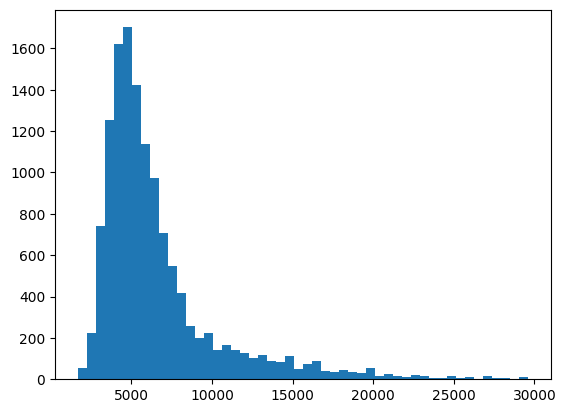

In [109]:
plt.hist(df3.price_per_sq,bins=50)

plt.xlabel=("price_per_sqft")
plt.ylabel=("count")
plt.show()

In [110]:
df3

,location,size,total_sqft,bath,price,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.0,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.0,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.0,6246.0
4,Kothanur,2 BHK,1200.0,2.0,51.0,4250.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,6690.0
13316,Richards Town,4 BHK,3600.0,5.0,400.0,11111.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,5259.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,10407.0


In [111]:
df3["bhk"]=df3["size"].apply(lambda x:int(x.split(" ")[0]))

In [112]:
df3.describe().round()

,total_sqft,bath,price,price_per_sq,bhk
count,13217.0,13217.0,13217.0,13217.0,13217.0
mean,1533.0,3.0,110.0,6621.0,3.0
std,946.0,1.0,132.0,3910.0,1.0
min,250.0,1.0,8.0,1667.0,1.0
25%,1100.0,2.0,50.0,4255.0,2.0
50%,1282.0,2.0,72.0,5444.0,3.0
75%,1654.0,3.0,120.0,7334.0,3.0
max,30400.0,40.0,2736.0,29630.0,43.0


In [113]:
df3.describe()

,total_sqft,bath,price,price_per_sq,bhk
count,13217.000000,13217.000000,13217.000000,13217.000000,13217.000000
mean,1532.813346,2.688129,109.707044,6620.716577,2.797533
std,945.807505,1.328027,132.253838,3910.225747,1.285401
min,250.000000,1.000000,8.000000,1667.000000,1.000000
25%,1100.000000,2.000000,50.000000,4255.000000,2.000000
50%,1282.000000,2.000000,72.000000,5444.000000,3.000000
75%,1654.000000,3.000000,120.000000,7334.000000,3.000000
max,30400.000000,40.000000,2736.000000,29630.000000,43.000000


In [114]:
df4=df3[df3["total_sqft"]/df3["bhk"]>300]

In [115]:
df4=df4[df4["bhk"]+2>df4["bath"]]

In [116]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12153 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      12153 non-null  object 
 1   size          12153 non-null  object 
 2   total_sqft    12153 non-null  float64
 3   bath          12153 non-null  float64
 4   price         12153 non-null  float64
 5   price_per_sq  12153 non-null  float64
 6   bhk           12153 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 759.6+ KB


In [117]:
h=df4.price.quantile(0.989)

In [118]:
df4=df4[df4["price"]<h]

In [119]:
df4.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'price_per_sq',
       'bhk'],
      dtype='object')

In [120]:
#value=df4.location.value_counts(ascending=False)

In [121]:
#oth=value[value<11]

In [122]:
#df4["location"]=df4["location"].apply(lambda x:"other" if x in oth else x)

In [123]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield          521
Sarjapur  Road      376
Electronic City     293
Kanakpura Road      263
Thanisandra         234
                   ... 
Ullal Road            1
Shettihalli           1
MRCR Layout           1
Bull Temple Road      1
Abshot Layout         1
Name: location, Length: 1158, dtype: int64

In [124]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Jayanagar      10
Banashankari Stage VI    10
Tindlu                   10
Laggere                  10
Nagappa Reddy Layout     10
                         ..
Ullal Road                1
Shettihalli               1
MRCR Layout               1
Bull Temple Road          1
Abshot Layout             1
Name: location, Length: 940, dtype: int64

In [125]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [126]:
df4.describe()

,total_sqft,bath,price,price_per_sq,bhk
count,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000
mean,1505.741305,2.480779,95.592611,5952.251789,2.594775
std,728.539654,0.956056,81.131725,2918.407098,0.918251
min,340.000000,1.000000,9.000000,1667.000000,1.000000
25%,1115.000000,2.000000,48.000000,4171.000000,2.000000
50%,1300.000000,2.000000,68.000000,5218.500000,2.000000
75%,1654.000000,3.000000,110.000000,6718.000000,3.000000
max,10000.000000,16.000000,560.000000,29151.000000,16.000000


In [127]:
df4=df4

#### 

In [128]:
dum=pd.get_dummies(df4["location"])

In [129]:
dum

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df5=pd.concat([df4,dum],axis=1)

In [131]:
df5

,location,size,total_sqft,bath,price,price_per_sq,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.0,3700.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.0,4615.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.0,4306.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.0,6246.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.0,4250.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,6690.0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,other,4 BHK,3600.0,5.0,400.0,11111.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,5259.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,10407.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
df4

,location,size,total_sqft,bath,price,price_per_sq,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.0,3700.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.0,4615.0,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.0,4306.0,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.0,6246.0,3
4,Kothanur,2 BHK,1200.0,2.0,51.0,4250.0,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,6690.0,5
13316,other,4 BHK,3600.0,5.0,400.0,11111.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,5259.0,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,10407.0,4


In [133]:
dum

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df5=pd.concat([df4,dum.drop("other",axis=1)],axis=1)

##### 

In [135]:
df5=df5.drop(["location","size"],axis=1)

In [136]:
df5.describe()

,total_sqft,bath,price,price_per_sq,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,...,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000
mean,1505.741305,2.480779,95.592611,5952.251789,2.594775,0.001747,0.000915,0.002912,0.001664,0.012148,...,0.000915,0.002247,0.003079,0.003495,0.043352,0.001415,0.016558,0.002996,0.001082,0.006573
std,728.539654,0.956056,81.131725,2918.407098,0.918251,0.041767,0.030241,0.053889,0.040762,0.109553,...,0.030241,0.047347,0.055403,0.059016,0.203656,0.037585,0.127615,0.054651,0.032873,0.080813
min,340.000000,1.000000,9.000000,1667.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1115.000000,2.000000,48.000000,4171.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1300.000000,2.000000,68.000000,5218.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1654.000000,3.000000,110.000000,6718.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10000.000000,16.000000,560.000000,29151.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
x=df5.drop("price",axis=1)

In [138]:
y=df5.price

In [139]:
len(x)

12018

In [140]:
len(y)

12018

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [142]:
cross_val_score(LinearRegression(),x,y,cv=3)

array([0.93293564, 0.93077015, 0.93099031])

In [143]:
from sklearn.model_selection import ShuffleSplit

In [144]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    t = np.zeros(len(x.columns))
    t[0] = sqft
    t[1] = bath
    t[2] = bhk
    if loc_index >= 0:
        t[loc_index] = 1

    return model.predict([t])[0]

In [145]:
x=x.drop("price_per_sq",axis=1)

In [146]:
len(y)

12018

In [147]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [148]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vasanthapura', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=221)

In [149]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Denny\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


93.12816322989742

In [150]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vasanthapura', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=221)

In [151]:
x.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Denny\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


155.80371106909848